# **Entrega final Introduccion al aprendizaje automatico - Notebook**
2do Cuatrimestre 2023

Integrantes:

*  Quiñones, María Belén (mquinones@estudiantes.unsam.edu.ar)
*  Rolando, Julián (jdrolando@estudiantes.unsam.edu.ar)


**Dataset :**
https://www.kaggle.com/datasets/edoardoba/world-flags/code banderas

##Carga de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_flags = pd.read_csv('/content/drive/MyDrive/TP IAA/flags.csv',delimiter=';')
df_flags  = df_flags.drop('image',axis = 1)
df_flags  = df_flags.rename(columns = {'name':'nombre', 'red ':'rojo', 'orange ':'naranja', 'landmass':'continente', 'zone' : 'zona',
                                      'area' : 'superficie', 'population':'poblacion', 'language':'idioma', 'colours':'colores', 'bars':'barras', 'stripes':'rayas',
                                      'green':'verde', 'blue':'azul', 'gold':'dorado', 'white':'blanco', 'black':'negro', 'mainhue':'color_principal',
                                      'circles':'circulos', 'crosses':'cruces', 'saltires':'cruces_diagonal', 'quarters':'cuartos',
                                      'sunstars':'soles', 'crescent':'lunas_crecientes', 'triangle':'triangulos', 'icon':'icono', 'animate':'animado',
                                      'text':'texto'})


In [ ]:
df_flags.columns

Index(['nombre', 'continente', 'zona', 'superficie', 'poblacion', 'idioma',
       'religion', 'barras', 'rayas', 'colores', 'rojo', 'verde', 'azul',
       'dorado', 'blanco', 'negro', 'naranja', 'color_principal', 'circulos',
       'cruces', 'cruces_diagonal', 'cuartos', 'soles', 'lunas_crecientes',
       'triangulos', 'icono', 'animado', 'texto', 'topleft', 'botright'],
      dtype='object')

# ONE HOT ENCODING

In [ ]:
df_flags.color_principal.value_counts()

red       71
blue      39
green     31
white     22
gold      19
black      5
orange     4
brown      2
Name: color_principal, dtype: int64

In [ ]:
dummies_mainhue = pd.get_dummies(df_flags['color_principal'], prefix = "principal" , drop_first = True)
df_flags = pd.concat([df_flags, dummies_mainhue], axis = 1)

#Exploración

In [ ]:
#Vemos las columnas,  los tipos de datos y el contenido
df_flags.columns

Index(['nombre', 'continente', 'zona', 'superficie', 'poblacion', 'idioma',
       'religion', 'barras', 'rayas', 'colores', 'rojo', 'verde', 'azul',
       'dorado', 'blanco', 'negro', 'naranja', 'color_principal', 'circulos',
       'cruces', 'cruces_diagonal', 'cuartos', 'soles', 'lunas_crecientes',
       'triangulos', 'icono', 'animado', 'texto', 'topleft', 'botright',
       'principal_blue', 'principal_brown', 'principal_gold',
       'principal_green', 'principal_orange', 'principal_red',
       'principal_white'],
      dtype='object')

In [ ]:
df_flags.dtypes

nombre              object
continente           int64
zona                 int64
superficie           int64
poblacion            int64
idioma               int64
religion             int64
barras               int64
rayas                int64
colores              int64
rojo                 int64
verde                int64
azul                 int64
dorado               int64
blanco               int64
negro                int64
naranja              int64
color_principal     object
circulos             int64
cruces               int64
cruces_diagonal      int64
cuartos              int64
soles                int64
lunas_crecientes     int64
triangulos           int64
icono                int64
animado              int64
texto                int64
topleft             object
botright            object
principal_blue       uint8
principal_brown      uint8
principal_gold       uint8
principal_green      uint8
principal_orange     uint8
principal_red        uint8
principal_white      uint8
d

In [ ]:
df_flags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nombre            193 non-null    object
 1   continente        193 non-null    int64 
 2   zona              193 non-null    int64 
 3   superficie        193 non-null    int64 
 4   poblacion         193 non-null    int64 
 5   idioma            193 non-null    int64 
 6   religion          193 non-null    int64 
 7   barras            193 non-null    int64 
 8   rayas             193 non-null    int64 
 9   colores           193 non-null    int64 
 10  rojo              193 non-null    int64 
 11  verde             193 non-null    int64 
 12  azul              193 non-null    int64 
 13  dorado            193 non-null    int64 
 14  blanco            193 non-null    int64 
 15  negro             193 non-null    int64 
 16  naranja           193 non-null    int64 
 17  color_principal 

In [ ]:
df_flags.head()

,nombre,continente,zona,superficie,poblacion,idioma,religion,barras,rayas,colores,...,texto,topleft,botright,principal_blue,principal_brown,principal_gold,principal_green,principal_orange,principal_red,principal_white
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,black,green,0,0,0,1,0,0,0
1,Albania,3,1,29,3,6,6,0,0,3,...,0,red,red,0,0,0,0,0,1,0
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,green,white,0,0,0,1,0,0,0
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,blue,red,1,0,0,0,0,0,0
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,blue,red,0,0,1,0,0,0,0


 ### **Vemos que valores pueden tomar algunos atributos**

In [ ]:
df_flags.idioma.unique()  #1 = inglés, 2 = español, 3 = francés, 4 = alemán, 5 = eslavo, 6 = otro indoeuropeo, 7 = chino, 8 = árabe, 9 = japonés / turco / finlandés / magiar, 10 = otros


array([10,  6,  8,  1,  2,  4,  3,  5,  7,  9])

In [ ]:
df_flags.religion.unique() # 0=Católico, 1 = Otro cristiano, 2 = Musulmán, 3 = Budista, 4 = Hindú, 5 = Étnico, 6 = Marxista, 7 = Otros


array([2, 6, 1, 0, 5, 3, 4, 7])

In [ ]:
df_flags.continente.unique()  #( 1 NAmerica, 2 SAmerica, 3 Europa, 4 Africa, 5 Asia, 6 Oceania)


array([5, 3, 4, 6, 1, 2])

In [ ]:
df_flags.topleft.unique()

array(['black', 'red', 'green', 'blue', 'white', 'orange', 'gold'],
      dtype=object)

In [ ]:
df_flags.botright.unique()

array(['green', 'red', 'white', 'black', 'blue', 'gold', 'orange',
       'brown'], dtype=object)

In [ ]:
df_flags.color_principal.unique()

array(['green', 'red', 'blue', 'gold', 'white', 'orange', 'black',
       'brown'], dtype=object)

**Vemos la distribucion de paises por religion, continente y lenguaje**

Distribución por continente

In [ ]:
df_flags.groupby('continente').nombre.nunique()

continente
1    31
2    16
3    35
4    52
5    39
6    20
Name: nombre, dtype: int64

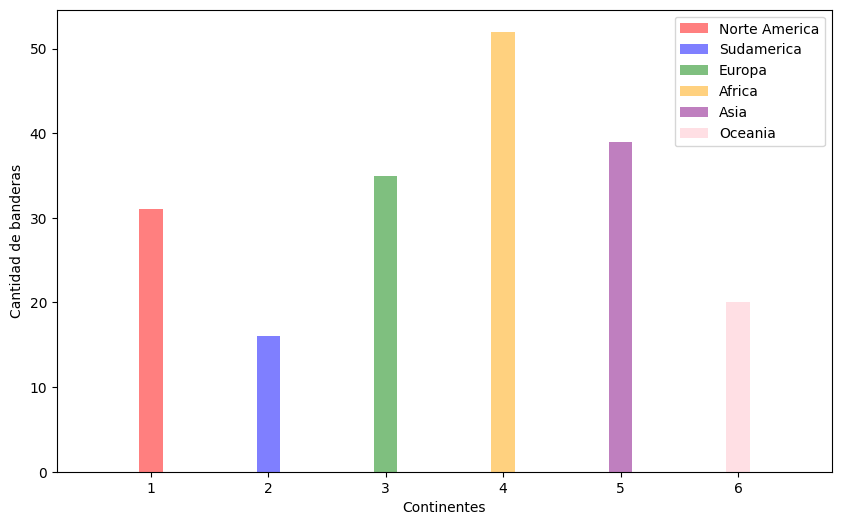

In [ ]:
# Define una lista de colores para los continentes
colores_continentes = ['red', 'blue', 'green', 'orange', 'purple', 'pink']

# Crea una lista de etiquetas de continentes
etiquetas_continentes = ['Norte America', 'Sudamerica', 'Europa', 'Africa', 'Asia', 'Oceania']

# Crea un histograma con colores diferentes para cada continente
plt.figure(figsize=(10, 6))
for i in range(1, 7):
    plt.hist(df_flags[df_flags['continente'] == i]['continente'], bins=5, alpha=0.5, color=colores_continentes[i - 1], label=etiquetas_continentes[i - 1])

# Añade etiquetas y leyendas
plt.xlabel('Continentes')
plt.ylabel('Cantidad de banderas')
plt.legend()

# Muestra el histograma
plt.show()

Distribución por religion

In [ ]:
df_flags.groupby('religion').nombre.nunique()

religion
0    39
1    60
2    36
3     8
4     4
5    27
6    15
7     4
Name: nombre, dtype: int64

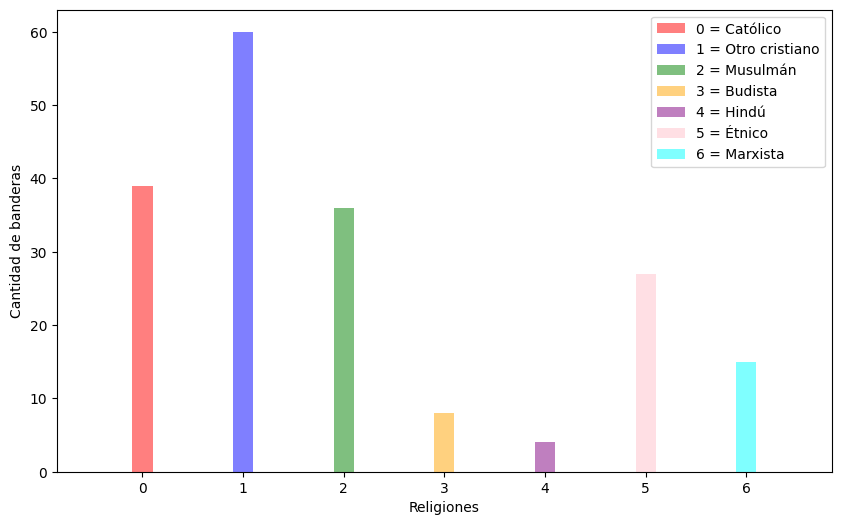

In [ ]:
# Define una lista de colores para las religiones
colores_religiones = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'cyan', 'magenta']
# Crea una lista de etiquetas de religiones
etiquetas_religiones = ['0 = Católico', '1 = Otro cristiano', '2 = Musulmán', '3 = Budista','4 = Hindú', '5 = Étnico', '6 = Marxista', '7 = Otros']

# Crea un histograma con colores diferentes para cada religion
plt.figure(figsize=(10, 6))
for i in range(0, 7):
    plt.hist(df_flags[df_flags['religion'] == i]['religion'], bins=5, alpha=0.5, color=colores_religiones[i], label=etiquetas_religiones[i])

# Añade etiquetas y leyendas
plt.xlabel('Religiones')
plt.ylabel('Cantidad de banderas')
plt.legend()

# Muestra el histograma
plt.show()

Distribución por lenguaje

In [ ]:
df_flags.groupby('idioma').nombre.nunique()

idioma
1     43
2     20
3     17
4      6
5      4
6     30
7      4
8     19
9      4
10    46
Name: nombre, dtype: int64

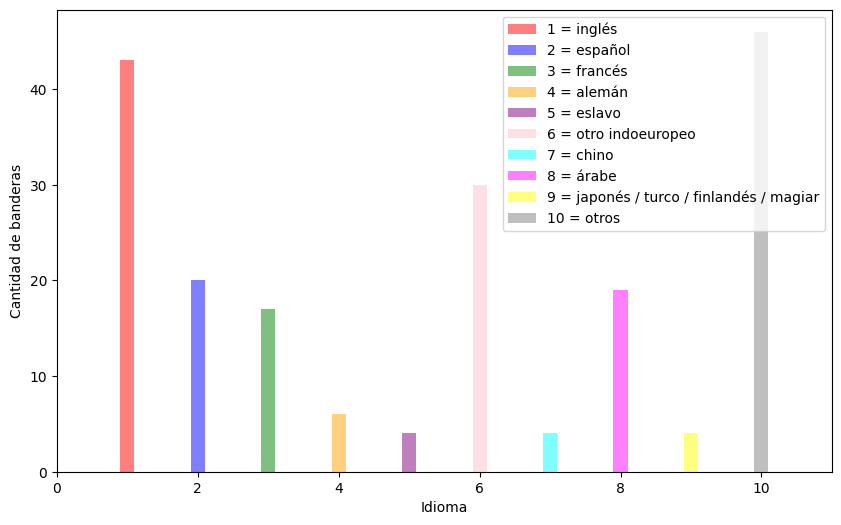

In [ ]:
# Define una lista de colores para los lenguajes
colores_lenguaje= ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'cyan', 'magenta','yellow','grey']
# Crea una lista de etiquetas de lenguaje
etiquetas_lenguaje = ['1 = inglés', '2 = español', '3 = francés', '4 = alemán', '5 = eslavo', '6 = otro indoeuropeo', '7 = chino', '8 = árabe', '9 = japonés / turco / finlandés / magiar', '10 = otros']

# Crea un histograma con colores diferentes para cada lenguaje
plt.figure(figsize=(10, 6))
for i in range(0, 10):
    plt.hist(df_flags[df_flags['idioma'] == i+1]['idioma'], bins=5, alpha=0.5, color=colores_lenguaje[i], label=etiquetas_lenguaje[i])

# Añade etiquetas y leyendas
plt.xlabel('Idioma')
plt.ylabel('Cantidad de banderas')
plt.legend()

# Muestra el histograma
plt.show()

Cantidad por Mainhue (Color principal)

In [ ]:
df_flags.groupby('color_principal').nombre.nunique()

color_principal
black      5
blue      39
brown      2
gold      19
green     31
orange     4
red       71
white     22
Name: nombre, dtype: int64

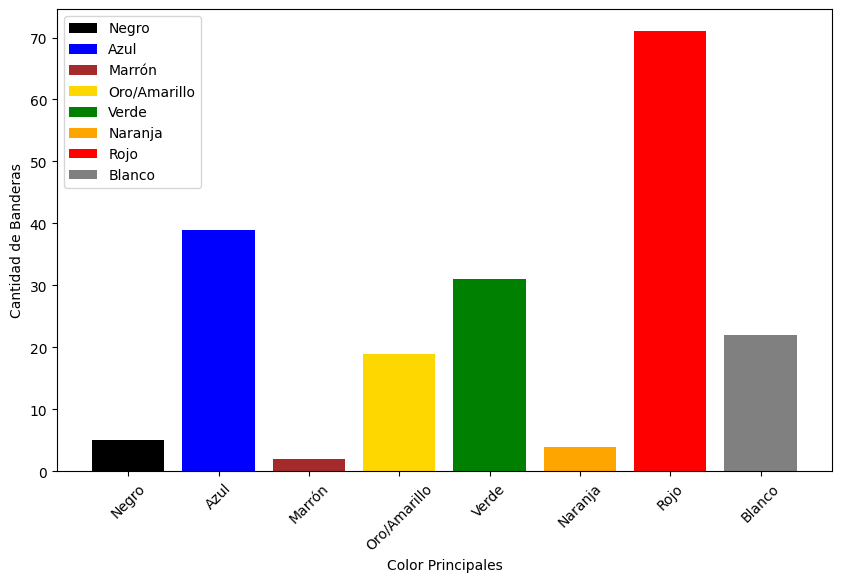

In [ ]:
# Define una lista de colores para mainhue
color_actual = ['black', 'blue', 'brown', 'gold', 'green', 'orange', 'red', 'white']
colores = ['black', 'blue', 'brown', 'gold', 'green', 'orange', 'red', 'grey']
# Crea una lista de etiquetas de colores
etiquetas = ['Negro', 'Azul', 'Marrón', 'Oro/Amarillo', 'Verde', 'Naranja', 'Rojo', 'Blanco']

# Crea un histograma con colores diferentes para cada color principal
plt.figure(figsize=(10, 6))
for i in range(8):
# color_actual = colores[i]
    etiqueta_actual = etiquetas[i]
    cantidad_bandas_color = len(df_flags[df_flags['color_principal'] == color_actual[i]])
    plt.bar(etiqueta_actual, cantidad_bandas_color, color=colores[i], label=etiqueta_actual)

# Añade etiquetas y leyendas
plt.xlabel('Color Principales')
plt.ylabel('Cantidad de Banderas')
plt.xticks(rotation=45)
plt.legend()

# Muestra el histograma
plt.show()

###  **Vemos un boceto de las relaciones entre variables usando la Matriz de correlacion y pairplot**

<ipython-input-18-5080c3c5a59a>:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_correlacion.corr()


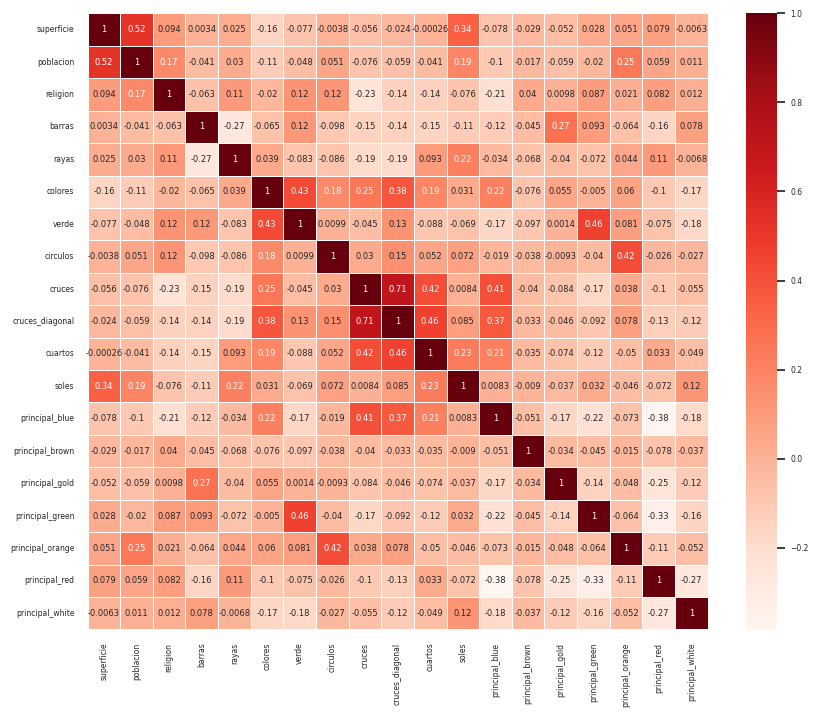

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Cambiamos el tipo de datos ya que algunas variables estan caracterizadas con numeros aunque hacen referencia a caracteristicas no numericas, pensamos que eso podia confundir en la matriz de correlación.
df_correlacion = df_flags.copy()
df_correlacion['color_principal'] = df_correlacion['color_principal'].astype('object')
df_correlacion['continente'] = df_correlacion['continente'].astype('object')
df_correlacion['zona'] = df_correlacion['zona'].astype('object')
df_correlacion['idioma'] = df_correlacion['idioma'].astype('object')
df_correlacion['religion'] = df_correlacion['religion'].astype('int64')
df_correlacion['rojo'] = df_correlacion['rojo'].astype('object')
df_correlacion['green'] = df_correlacion['verde'].astype('object')
df_correlacion['azul'] = df_correlacion['azul'].astype('object')
df_correlacion['dorado'] = df_correlacion['dorado'].astype('object')
df_correlacion['blanco'] = df_correlacion['blanco'].astype('object')
df_correlacion['negro'] = df_correlacion['negro'].astype('object')
df_correlacion['naranja'] = df_correlacion['naranja'].astype('object')
df_correlacion['icono'] = df_correlacion['icono'].astype('object')
df_correlacion['texto'] = df_correlacion['texto'].astype('object')
df_correlacion['lunas_crecientes'] = df_correlacion['lunas_crecientes'].astype('object')
df_correlacion['triangulos'] = df_correlacion['triangulos'].astype('object')
df_correlacion['topleft'] = df_correlacion['topleft'].astype('object')
df_correlacion['botright'] = df_correlacion['botright'].astype('object')
df_correlacion['animado'] = df_correlacion['animado'].astype('object')


# Calcula la matriz de correlación
correlation_matrix = df_correlacion.corr()

# Crea un mapa de calor con un tamaño de fuente personalizado
plt.figure(figsize=(10, 8))  # Ajusta el tamaño del mapa de calor
sns.set(font_scale=0.5)  # Ajusta el tamaño de la fuente
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', linewidths=.5)  # Personaliza colores y bordes

plt.show()

In [ ]:
sns.pairplot(df_correlacion, hue = 'religion')

In [ ]:
sns.pairplot(df_correlacion, hue = 'continente')

In [ ]:
sns.pairplot(df_correlacion, hue = 'idioma')

#Selección de target y atributos de la bandera para  RELIGIÓN

In [ ]:
columnas = ['continente', 'zona', 'superficie', 'poblacion', 'idioma','topleft','botright']
df_religion = df_flags.drop(columnas,axis=1)

In [ ]:
df_religion.columns

Index(['nombre', 'religion', 'barras', 'rayas', 'colores', 'rojo', 'verde',
       'azul', 'dorado', 'blanco', 'negro', 'naranja', 'color_principal',
       'circulos', 'cruces', 'cruces_diagonal', 'cuartos', 'soles',
       'lunas_crecientes', 'triangulos', 'icono', 'animado', 'texto',
       'principal_blue', 'principal_brown', 'principal_gold',
       'principal_green', 'principal_orange', 'principal_red',
       'principal_white'],
      dtype='object')

In [ ]:
df_religion.shape

(193, 30)

In [ ]:
df_religion.groupby('religion').nombre.nunique()

religion
0    39
1    60
2    36
3     8
4     4
5    27
6    15
7     4
Name: nombre, dtype: int64

In [ ]:
df_religion.query('religion==6') #etiquetas_religiones = ['0 = Católico', '1 = Otro cristiano', '2 = Musulmán', '3 = Budista','4 = Hindú', '5 = Étnico', '6 = Marxista', '7 = Otros']

In [ ]:
df_religion.loc[df_religion['nombre'] == 'Albania','religion'] = 2
df_religion.loc[df_religion['nombre'] == 'Bulgaria','religion'] = 1
df_religion.loc[df_religion['nombre'] == 'China','religion'] = 3
df_religion.loc[df_religion['nombre'] == 'Cuba','religion'] = 0
df_religion.loc[df_religion['nombre'] == 'Czechoslovakia','religion'] = 0
df_religion.loc[df_religion['nombre'] == 'Germany-DDR','religion'] = 1
df_religion.loc[df_religion['nombre'] == 'Hungary','religion'] = 0
df_religion.loc[df_religion['nombre'] == 'Laos','religion'] = 3
df_religion.loc[df_religion['nombre'] == 'Mongolia','religion'] = 3
df_religion.loc[df_religion['nombre'] == 'North-Korea','religion'] = 5
df_religion.loc[df_religion['nombre'] == 'Poland','religion'] = 0
df_religion.loc[df_religion['nombre'] == 'Romania','religion'] = 1
df_religion.loc[df_religion['nombre'] == 'USSR','religion'] = 1
df_religion.loc[df_religion['nombre'] == 'Vietnam','religion'] = 0
df_religion.loc[df_religion['nombre'] == 'Yugoslavia','religion'] = 1

In [ ]:
df_religion.loc[df_religion['nombre'] == 'Israel','religion'] = 1
df_religion.loc[df_religion['nombre'] == 'Japan','religion'] = 5
df_religion.loc[df_religion['nombre'] == 'South-Korea','religion'] = 1
df_religion.loc[df_religion['nombre'] == 'Togo','religion'] = 5

### Vemos la nueva

In [ ]:
df_religion.groupby('religion').nombre.nunique()

religion
0    44
1    67
2    37
3    11
4     4
5    30
Name: nombre, dtype: int64

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

etiquetas_religiones = ['0 = Católico', '1 = Otro cristiano', '2 = Musulmán', '3 = Budista', '4 = Hindú', '5 = Étnico']

columnas = ['nombre','religion','color_principal']
X = df_religion.drop(columnas, axis= 1)
y = df_religion['religion']

X_train, X_test, y_train_rel, y_test_rel = train_test_split(X, y, test_size=0.20, random_state=17, stratify= y)

## RANDOM FOREST

In [ ]:
import math
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()

rnd_clf.fit(X_train, y_train_rel)
y_train_pred = rnd_clf.predict(X_train)


NameError: ignored

In [ ]:
# Calcular el recall y la precisión para cada clase
#X_test = X_test.drop('nombre',axis=1)
from sklearn.metrics import f1_score

y_train_pred = rnd_clf.predict(X_train)
f_score_weighted = f1_score(y_train_rel, y_train_pred, average='weighted')

print(f"F-score ponderado en el conjunto de entrenamiento: {f_score_weighted:.2f}")



F-score ponderado en el conjunto de entrenamiento: 0.97


## GRID SEARCH SVM

In [ ]:
svm_clf = SVC(random_state=42)


# Definir el espacio de búsqueda de hiperparámetros para GridSearchCV
param_grid = {
    'C':[1,50,100],
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [2,3,5],
    'gamma': ['scale','auto']
}

#Empezamos a tomar el tiempo el tiempo
start = time.time()

# Aplicar GridSearchCV
grid_search = GridSearchCV(estimator=svm_clf , param_grid=param_grid, cv= 4,scoring='f1_weighted')

#Terminamos de tomar el tiempo
end = time.time()
print(f"GridSearchCV took {end - start} seconds.")

grid_search.fit(X_train,y_train)

grid_search.best_params_
grid_search.best_score_
#display(pd.DataFrame(grid_search.cv_results_))




GridSearchCV took 0.00016951560974121094 seconds.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


0.42469040373559597

In [ ]:
grid_search.best_params_

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
grid_search.best_score_

0.42469040373559597

##GRID SEARCH KNN


In [ ]:
knn = KNeighborsClassifier()

# Definir el espacio de búsqueda de hiperparámetros para GridSearchCV
param_grid = {
    'n_neighbors': [3,5,10,20,30],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],  # Agregar métrica de distancia (1 para Manhattan, 2 para Euclidiana)
    'leaf_size': [10, 20, 30]  # Agregar leaf_size si es relevante para el algoritmo
}

#Empezamos a tomar el tiempo el tiempo
start = time.time()

# Aplicar GridSearchCV
grid_search = GridSearchCV(estimator= knn, param_grid=param_grid, cv= 4,scoring='f1_weighted')

#Terminamos de tomar el tiempo
end = time.time()
print(f"GridSearchCV took {end - start} seconds.")

grid_search.fit(X_train,y_train)

#grid_search.best_params_
#grid_search.best_score_
#display(pd.DataFrame(grid_search.cv_results_))


GridSearchCV took 0.0001163482666015625 seconds.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30],
                         'n_neighbors': [3, 5, 10, 20, 30], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [ ]:
grid_search.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 10,
 'p': 1,
 'weights': 'distance'}

In [ ]:
grid_search.best_score_

0.49056406420006693

## GRID SEARCH Regresión Logística

In [ ]:
poly_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    #('poly', PolynomialFeatures()),  # Puedes ajustar los parámetros de PolynomialFeatures aquí
    ('logreg', LogisticRegression(penalty='l1'))#,solver = 'liblinear'))
])

param_grid = {
    'logreg__C': [0.00001, 0.001, 0.1, 0.99, 10, 100, 1000000],
    'logreg__class_weight': ['dict', 'balanced'],
    'logreg__solver': ['liblinear', 'saga']
}

# Aplicar GridSearchCV
grid_search = GridSearchCV(estimator=poly_reg_pipeline, param_grid=param_grid, cv=4, scoring='f1_weighted')

# Entrenar el modelo
grid_search.fit(X_train, y_train_rel)


In [ ]:
grid_search.best_params_

{'logreg__C': 0.99,
 'logreg__class_weight': 'balanced',
 'logreg__solver': 'saga'}

In [ ]:
grid_search.best_score_

0.4413669080176893

In [ ]:
# Obtener el mejor modelo de la búsqueda
best_lr_model_rel = grid_search.best_estimator_

# Obtener el modelo de regresión logística específico del pipeline
logreg_model = best_lr_model_rel.named_steps['logreg']

# Obtener los coeficientes y el nombre de las columnas originales
coefficients_rel = logreg_model.coef_
columnas = X.columns

# Crear un DataFrame con los coeficientes y las columnas correspondientes
coeficientes_df = pd.DataFrame(data=coefficients_rel, columns=columnas)

# Configurar pandas para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Imprimir el DataFrame
display(coeficientes_df)


,barras,rayas,colores,rojo,verde,azul,dorado,blanco,negro,naranja,circulos,cruces,cruces_diagonal,cuartos,soles,lunas_crecientes,triangulos,icono,animado,texto,principal_blue,principal_brown,principal_gold,principal_green,principal_orange,principal_red,principal_white
0,0.345774,0.000000,0.000000,0.000478,-0.531572,0.000000,0.000000,0.159281,-0.039973,0.336283,0.000000,0.000000,-0.241928,0.016992,0.027955,-0.529844,0.015481,0.000000,-0.304738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190006
1,0.000000,-0.095183,0.505459,-0.444404,-0.208173,0.083636,0.085318,0.000000,0.000000,-0.035677,-0.029386,0.748454,0.077166,-0.061990,0.271763,-0.315917,-0.054931,0.000393,0.278619,-0.054998,0.052123,0.000000,-0.067159,-0.005822,0.000000,0.000890,0.347797
2,0.000000,0.091657,-0.061258,-0.086254,0.206462,-1.072624,-0.533783,0.296827,0.000838,0.000000,-0.005959,-0.183884,-0.259633,0.000000,-0.124738,0.507134,0.013260,-0.015143,0.000000,0.351608,0.000000,0.174939,0.134109,0.000000,0.254443,-0.182763,-1.318648
3,0.000000,-0.022332,-0.536175,-0.000109,-0.904805,0.003266,-0.037918,-0.211996,-1.127349,1.005770,0.842116,0.029594,0.066781,0.025665,0.324514,0.395438,-0.091435,0.619165,0.231118,0.346422,0.000018,-0.221658,0.181207,-0.912051,0.000000,0.684130,0.000000
4,-0.311510,-0.002237,1.071761,0.671001,0.900275,0.347780,1.133541,-0.016160,0.000000,-0.025117,-0.036445,0.000000,0.000000,0.000000,-0.298384,0.236861,0.182923,-0.930239,-0.639802,-0.024892,-0.212618,1.023003,-0.584973,0.094848,0.000000,0.022612,0.000000
5,0.095319,0.510913,0.000000,0.000000,0.541736,-0.000091,-0.271519,-0.213378,0.431897,-0.031128,0.540042,-0.233083,0.000382,0.000000,-0.041031,-0.244933,-0.058551,0.000000,0.000000,0.000000,0.000000,0.000000,0.111439,0.000000,0.000000,-0.208183,0.000000


0 = Católico


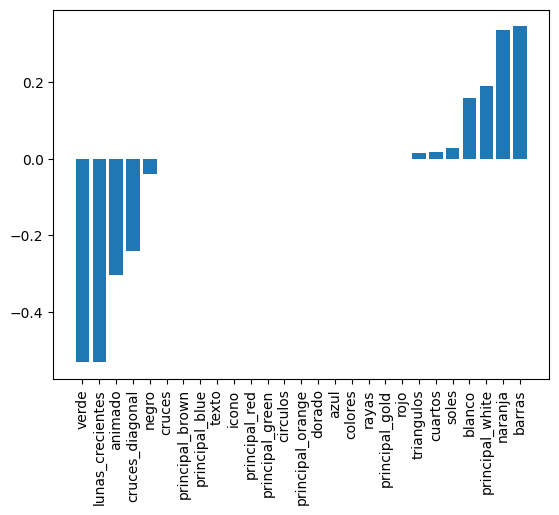

1 = Otro cristiano


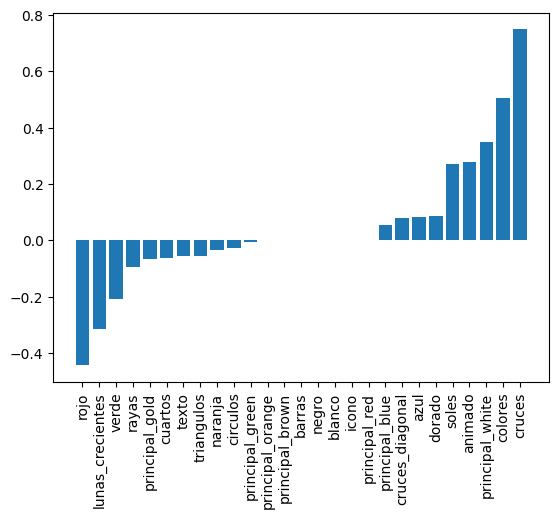

2 = Musulmán


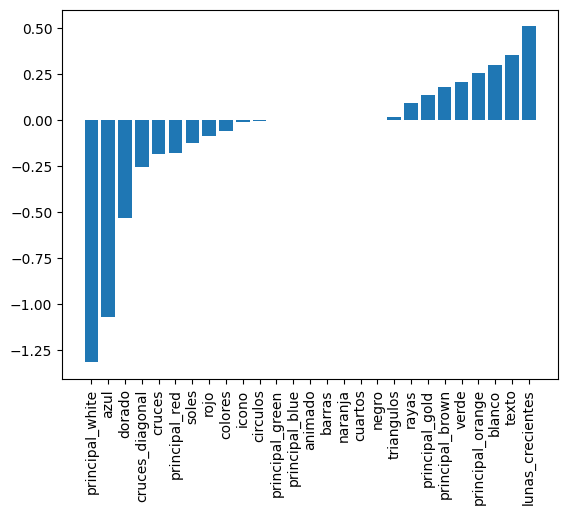

3 = Budista


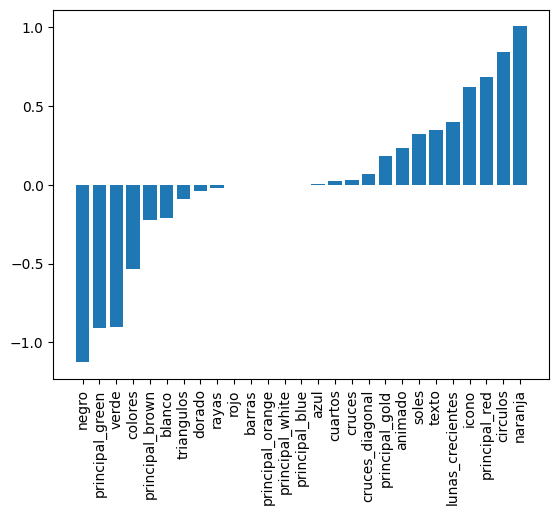

4 = Hindú


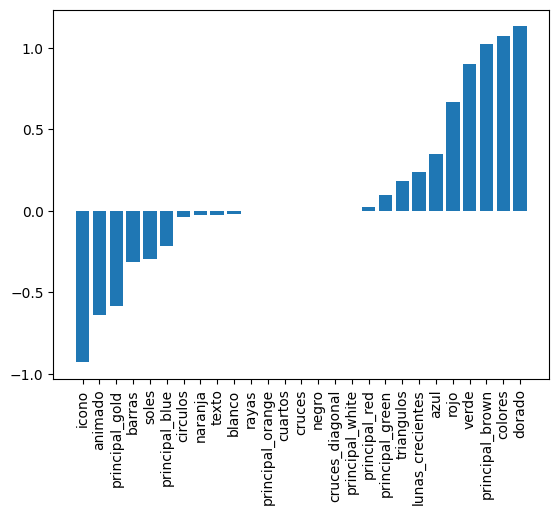

5 = Étnico


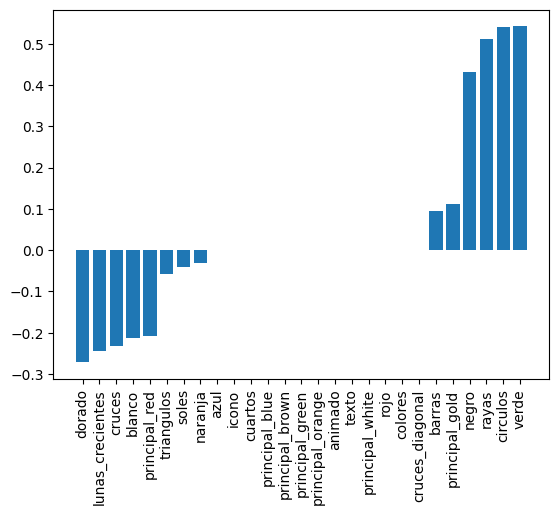

In [ ]:
for i, coef in enumerate(coefficients_rel):
    # Obtener índices ordenados por coeficiente
    indices_ordenados = coef.argsort()

    print(etiquetas_religiones[i])

    # Crear un gráfico de barras ordenado por coeficiente
    plt.bar(X_train.columns[indices_ordenados], coef[indices_ordenados])
    plt.xticks(rotation=90)
    plt.show()

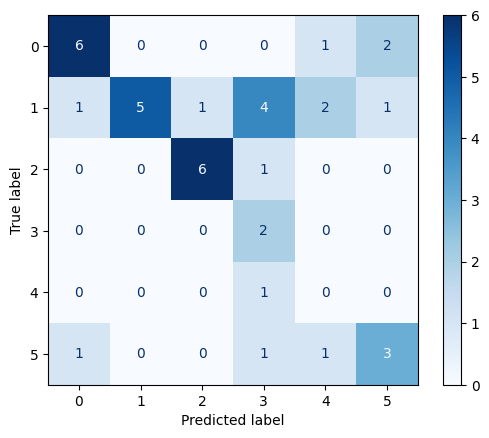

Precisión del modelo: 0.77
Informe de Clasificación:
                    precision    recall  f1-score   support

      0 = Católico       0.75      0.67      0.71         9
1 = Otro cristiano       1.00      0.36      0.53        14
      2 = Musulmán       0.86      0.86      0.86         7
       3 = Budista       0.22      1.00      0.36         2
         4 = Hindú       0.00      0.00      0.00         1
        5 = Étnico       0.50      0.50      0.50         6

          accuracy                           0.56        39
         macro avg       0.55      0.56      0.49        39
      weighted avg       0.77      0.56      0.60        39

País: Trinidad-Tobago
Predicción: 2 = 2 = Musulmán
Real: 1 = 1 = Otro cristiano

País: Ireland
Predicción: 0 = 0 = Católico
Real: 0 = 0 = Católico

País: Turks-Cocos-Islands
Predicción: 1 = 1 = Otro cristiano
Real: 1 = 1 = Otro cristiano

País: Algeria
Predicción: 2 = 2 = Musulmán
Real: 2 = 2 = Musulmán

País: Bolivia
Predicción: 4 = 4 = Hind

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#X_test = X_test.drop('nombre',axis=1)

# Hacer predicciones en los datos de prueba
y_test_pred_rel = best_lr_model_rel.predict(X_test)

# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_test_rel, y_test_pred_rel)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Calcular la precisión del modelo
precision = precision_score(y_test_rel, y_test_pred_rel, average='weighted')
print(f"Precisión del modelo: {precision:.2f}")

# Imprimir informe de clasificación
print("Informe de Clasificación:")
print(classification_report(y_test_rel, y_test_pred_rel, target_names=etiquetas_religiones))

# Agregar la columna 'nombre' a X_test
X_test['nombre'] = df_religion.loc[X_test.index, 'nombre']

# Iterar sobre las predicciones y mostrar la información con el nombre del país
for i in range(len(y_test_rel)):
    nombre_pais = X_test.loc[X_test.index[i], 'nombre']
    print(f"País: {nombre_pais}")
    print(f"Predicción: {y_test_pred_rel[i]} = {etiquetas_religiones[y_test_pred_rel[i]]}")
    print(f"Real: {y_test_rel.iloc[i]} = {etiquetas_religiones[y_test_rel.iloc[i]]}")
    print()




# Seleccion de target y atributos idioma

In [ ]:
df_flags.columns

Index(['nombre', 'religion', 'barras', 'rayas', 'colores', 'rojo', 'verde',
       'azul', 'dorado', 'blanco', 'negro', 'naranja', 'color_principal',
       'circulos', 'cruces', 'cruces_diagonal', 'cuartos', 'soles',
       'lunas_crecientes', 'triangulos', 'icono', 'animado', 'texto',
       'principal_blue', 'principal_brown', 'principal_gold',
       'principal_green', 'principal_orange', 'principal_red',
       'principal_white'],
      dtype='object')

In [ ]:
columnas = ['continente', 'zona', 'superficie', 'poblacion','religion']
df_idiomas = df_flags.drop(columnas,axis=1)

## Procesado idioma

Referencias Idiomas : 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others

In [ ]:
df_idiomas.idioma.value_counts()

10    46
1     43
6     30
2     20
8     19
3     17
4      6
5      4
7      4
9      4
Name: idioma, dtype: int64

In [ ]:
df_idiomas.query('idioma==9')


,nombre,idioma,barras,rayas,colores,rojo,verde,azul,dorado,blanco,...,cruces_diagonal,cuartos,soles,lunas_crecientes,triangulos,icono,animado,texto,topleft,botright
57,Finland,9,0,0,2,0,0,1,0,1,...,0,0,0,0,0,0,0,0,white,white
78,Hungary,9,0,3,3,1,1,0,0,1,...,0,0,0,0,0,0,0,0,red,green
89,Japan,9,0,0,2,1,0,0,0,1,...,0,0,1,0,0,0,0,0,white,white
174,Turkey,9,0,0,2,1,0,0,0,1,...,0,0,1,1,0,0,0,0,red,red


In [ ]:
df_idiomas.loc[df_idiomas['nombre'] == 'Gabon','idioma'] = 2
df_idiomas.loc[df_idiomas['nombre'] == 'Nigeria','idioma'] = 1
df_idiomas.loc[df_idiomas['nombre'] == 'Finland','idioma'] = 10
df_idiomas.loc[df_idiomas['nombre'] == 'Hungary','idioma'] = 10
df_idiomas.loc[df_idiomas['nombre'] == 'Japan','idioma'] = 10
df_idiomas.loc[df_idiomas['nombre'] == 'Turkey','idioma'] = 10
df_idiomas.loc[df_idiomas['nombre'] == 'Bulgaria','idioma'] = 6
df_idiomas.loc[df_idiomas['nombre'] == 'Czechoslovakia','idioma'] = 6
df_idiomas.loc[df_idiomas['nombre'] == 'Poland','idioma'] = 6
df_idiomas.loc[df_idiomas['nombre'] == 'USSR','idioma'] = 6
df_idiomas.loc[df_idiomas['nombre'] == 'Congo','idioma'] = 3
df_idiomas.loc[df_idiomas['nombre'] == 'Equatorial-Guinea','idioma'] = 2
df_idiomas.loc[df_idiomas['nombre'] == 'Liberia','idioma'] = 2
df_idiomas.loc[df_idiomas['nombre'] == 'Micronesia','idioma'] = 2
df_idiomas.loc[df_idiomas['nombre'] == 'Zaire','idioma'] = 3
df_idiomas.loc[df_idiomas['nombre'] == 'Zambia','idioma'] = 1

### **Vemos la nueva distribución**

In [ ]:
df_idiomas.groupby('idioma').nombre.nunique()

idioma
1     45
2     24
3     19
4      6
6     34
7      4
8     19
10    42
Name: nombre, dtype: int64

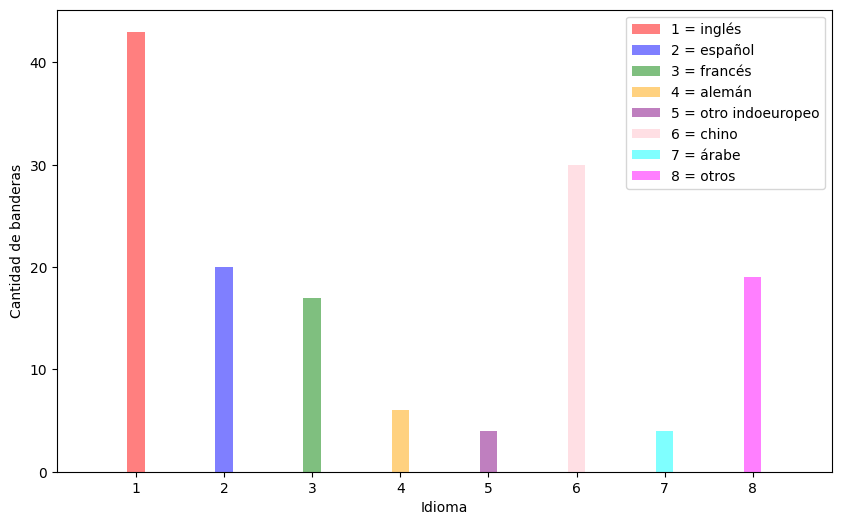

In [ ]:
# Define una lista de colores para los lenguajes
colores_lenguaje= ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'cyan', 'magenta','yellow','grey']
# Crea una lista de etiquetas de lenguaje
etiquetas_lenguaje = ['1 = inglés', '2 = español', '3 = francés', '4 = alemán', '5 = otro indoeuropeo', '6 = chino', '7 = árabe', '8 = otros']

# Crea un histograma con colores diferentes para cada lenguaje
plt.figure(figsize=(10, 6))
for i in range(0, 8):
    plt.hist(df_flags[df_flags['idioma'] == i+1]['idioma'], bins=5, alpha=0.5, color=colores_lenguaje[i], label=etiquetas_lenguaje[i])

# Añade etiquetas y leyendas
plt.xlabel('Idioma')
plt.ylabel('Cantidad de banderas')
plt.legend()

# Muestra el histograma
plt.show()

In [ ]:
columnas = ['topleft','botright']
df_idiomas = df_idiomas.drop(columnas,axis=1)

columnas = ['nombre','idioma','color_principal']
X = df_idiomas.drop(columnas, axis= 1)
y = df_idiomas['idioma']

etiquetas_idiomas = ['1=English', '2=Spanish', '3=French', '4=German','5=Other Indo-European', '7=Chinese', '8=Arabic','9 =Others']

X_train, X_test, y_train_id, y_test_id = train_test_split(X, y, test_size=0.20, random_state=17, stratify= y)

KeyError: ignored

In [ ]:
poly_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    #('poly', PolynomialFeatures()),  # Puedes ajustar los parámetros de PolynomialFeatures aquí
    ('logreg', LogisticRegression(penalty='l1'))#,solver = 'liblinear'))
])

param_grid = {
    'logreg__C': [0.00001, 0.001, 0.1, 0.99, 10, 100, 1000000],
    'logreg__class_weight': ['dict', 'balanced'],
    'logreg__solver': ['liblinear', 'saga']
}

# Aplicar GridSearchCV
grid_search = GridSearchCV(estimator=poly_reg_pipeline, param_grid=param_grid, cv=4, scoring='f1_weighted')

# Entrenar el modelo
grid_search.fit(X_train, y_train_id)

In [ ]:
# Obtener el mejor modelo de la búsqueda
best_lr_model = grid_search.best_estimator_

# Obtener el modelo de regresión logística específico del pipeline
logreg_model = best_lr_model.named_steps['logreg']

# Obtener los coeficientes y el nombre de las columnas originales
coefficients_id = logreg_model.coef_
columnas = X.columns

# Crear un DataFrame con los coeficientes y las columnas correspondientes
coeficientes_df = pd.DataFrame(data=coefficients_id, columns=columnas)

# Configurar pandas para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Imprimir el DataFrame
display(coeficientes_df)

,barras,rayas,colores,rojo,verde,azul,dorado,blanco,negro,naranja,circulos,cruces,cruces_diagonal,cuartos,soles,lunas_crecientes,triangulos,icono,animado,texto,principal_blue,principal_brown,principal_gold,principal_green,principal_orange,principal_red,principal_white
0,0.278802,-1.059126,0.707953,-0.111478,-0.033357,0.000000,0.351677,0.270534,0.000000,0.000000,-0.296898,0.000000,0.702977,0.000000,0.141867,-0.144285,0.182933,-0.172713,0.292199,-0.264596,0.000000,-0.024302,-0.223007,0.009734,-0.221388,0.000000,-0.010029
1,0.000000,0.670752,-0.402381,0.130456,-0.123908,0.570129,0.000000,-0.089785,-0.524104,-0.209180,0.000000,-0.608788,-0.210650,0.274065,-0.250819,-0.816665,0.044441,-0.436968,0.000000,0.340401,0.382691,0.000000,0.131555,0.000000,0.000000,0.000000,-0.311587
2,0.372791,-0.122059,0.000000,0.555828,0.508606,-0.062229,0.097680,-0.046259,-0.776328,0.000000,0.097975,-0.446103,-0.371440,0.000000,0.000000,0.036756,-0.086155,0.000000,-0.081569,-0.587847,0.000000,0.000000,-0.109481,0.294856,0.284554,-0.098709,0.081863
3,-0.833155,0.124268,0.000000,0.318148,-1.428532,0.000000,-0.180688,-0.451657,0.338497,0.000000,-0.431280,0.280575,-0.072362,-0.465212,-0.812088,-0.157793,-0.575130,0.268917,-0.558645,0.000000,-0.805383,-0.036473,0.000000,0.000000,0.000000,0.000000,-0.542460
4,-0.082503,0.018090,0.000000,0.000000,0.000000,0.025702,0.184231,0.000000,-0.010857,0.000000,-0.299889,0.542291,-0.426265,-0.563090,0.332312,-0.201259,-0.170781,-0.028348,0.000000,0.000000,-0.146270,0.000000,0.271629,-0.228643,0.448623,0.175360,0.540214
5,0.000000,-1.005393,0.000000,0.000000,-0.775323,0.011293,0.591479,-0.559663,-0.958898,0.775258,1.203345,0.000000,0.000000,0.219980,0.000000,-0.332912,0.000000,-0.563143,0.000000,0.590794,0.160411,0.000000,-0.134822,-0.129176,-1.078493,1.458619,0.000000
6,-0.761854,0.000000,0.000000,-0.393370,0.248967,-0.869354,-1.096242,0.000000,0.792197,0.000000,0.000000,-0.279301,0.000000,0.000000,-0.146235,0.134074,0.000000,0.000000,-0.050665,0.338057,-0.386557,0.121596,-0.334155,0.088820,-0.399864,0.000000,-0.350090
7,-0.015541,0.180265,0.000000,-0.053129,-0.248188,-0.144539,-0.198340,0.000000,0.225079,0.000000,0.163849,0.000000,-0.123976,-0.099271,0.000000,0.323253,0.000000,0.351384,0.000000,-0.046357,0.000000,0.039056,0.052650,0.000000,-0.001650,0.039761,0.000000


1=English


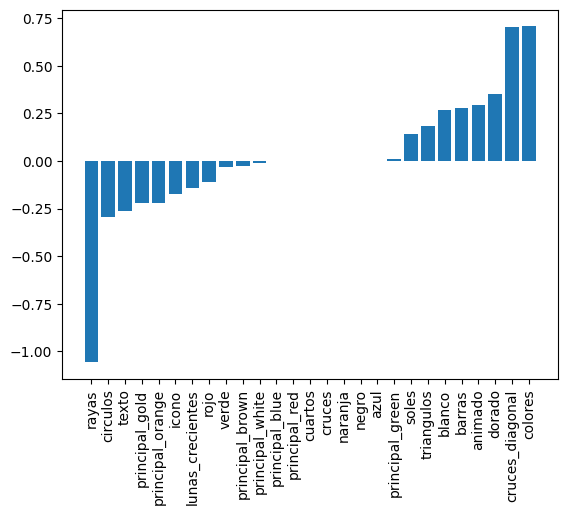

2=Spanish


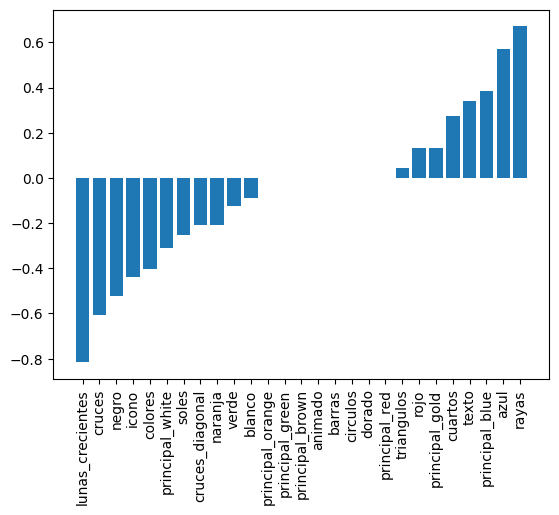

3=French


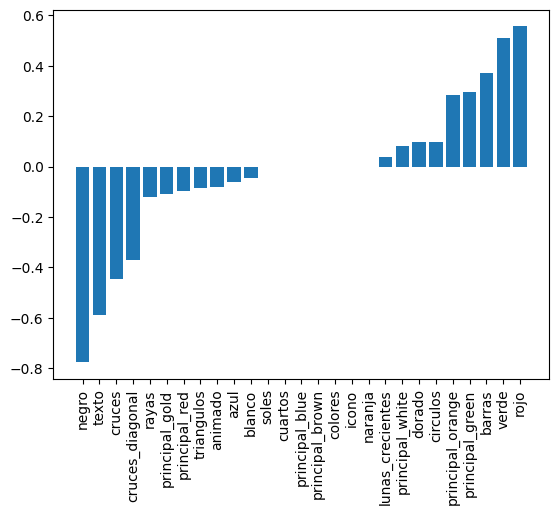

4=German


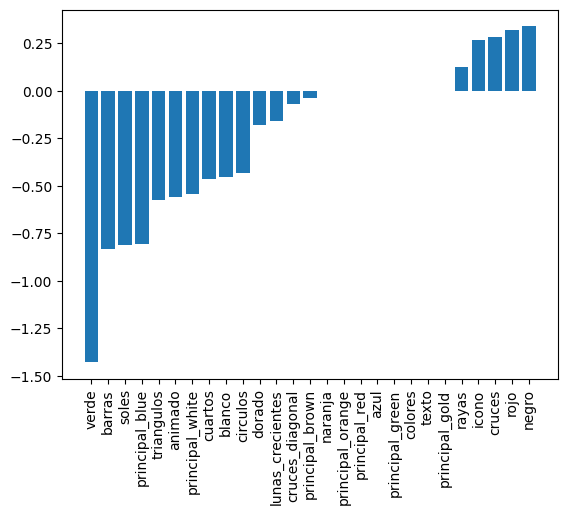

5=Other Indo-European


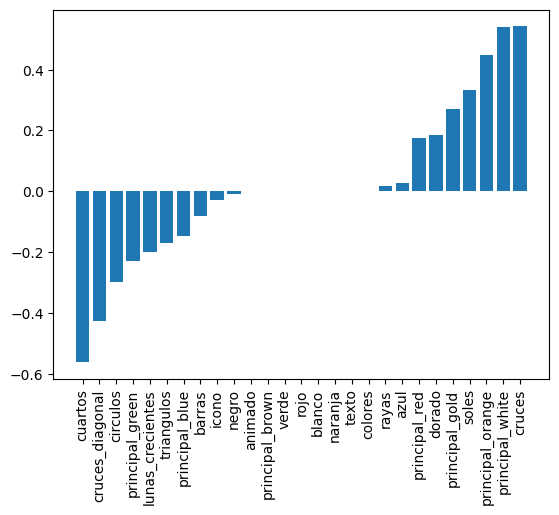

7=Chinese


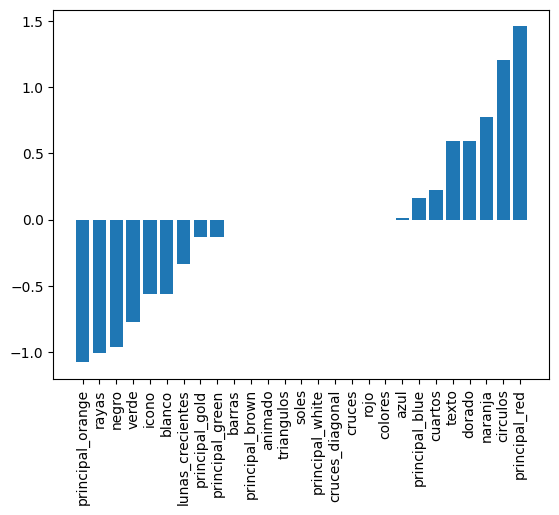

8=Arabic


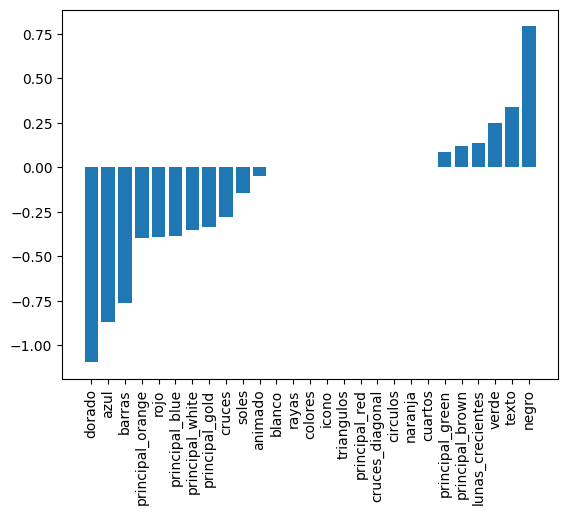

9 =Others


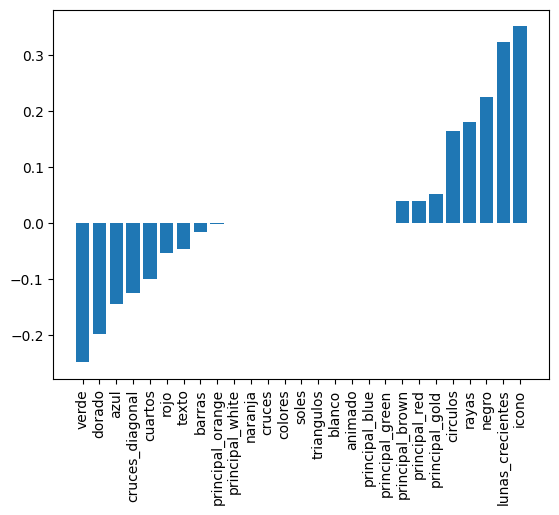

In [ ]:
for i, coef in enumerate(coefficients_id):
    # Obtener índices ordenados por coeficiente
    indices_ordenados = coef.argsort()

    print(etiquetas_idiomas[i])

    # Crear un gráfico de barras ordenado por coeficiente
    plt.bar(X_train.columns[indices_ordenados], coef[indices_ordenados])
    plt.xticks(rotation=90)
    plt.show()

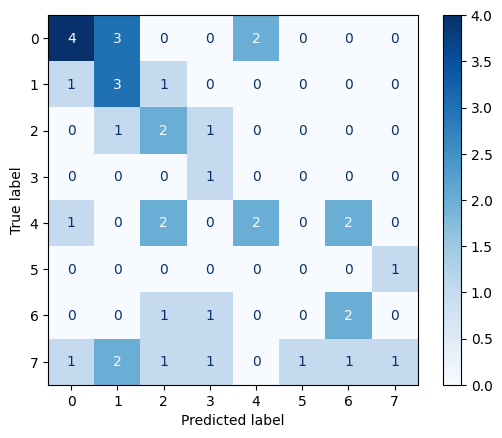

Informe de Clasificación:
                       precision    recall  f1-score   support

            1=English       0.57      0.44      0.50         9
            2=Spanish       0.33      0.60      0.43         5
             3=French       0.29      0.50      0.36         4
             4=German       0.25      1.00      0.40         1
5=Other Indo-European       0.50      0.29      0.36         7
            7=Chinese       0.00      0.00      0.00         1
             8=Arabic       0.40      0.50      0.44         4
            9 =Others       0.50      0.12      0.20         8

             accuracy                           0.38        39
            macro avg       0.36      0.43      0.34        39
         weighted avg       0.44      0.38      0.37        39

País: Pakistan


IndexError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

#X_test = X_test.drop('nombre',axis=1)

# Hacer predicciones en los datos de prueba
y_test_pred_id = best_lr_model.predict(X_test)

# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_test_id, y_test_pred_id)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

cm_display.plot(cmap=plt.cm.Blues)
plt.show()


# Imprimir informe de clasificación
print("Informe de Clasificación:")
print(classification_report(y_test_id, y_test_pred_id, target_names=etiquetas_idiomas))

# Agregar la columna 'nombre' a X_test
X_test['nombre'] = df_idiomas.loc[X_test.index, 'nombre']

# Iterar sobre las predicciones y mostrar la información con el nombre del país
for i in range(len(y_test_id)):
    nombre_pais = X_test.loc[X_test.index[i], 'nombre']
    print(f"País: {nombre_pais}")
    print(f"Predicción: {y_test_pred_id[i]} = {etiquetas_idiomas[y_test_pred_id[i]]}")
    print(f"Real: {y_test_id.iloc[i]} = {etiquetas_idiomas[y_test_id.iloc[i]]}")
    print()




#PREDICION CONTINENTE


In [ ]:
columnas = ['religion', 'zona', 'superficie', 'poblacion', 'idioma','topleft','botright']
df_continentes = df_flags.drop(columnas,axis=1)

In [ ]:
columnas = ['nombre','continente','color_principal']
X = df_continentes.drop(columnas, axis= 1)
y = df_continentes['continente']

etiquetas_continentes = ['1 = NAmerica', '2 = SAmerica', '3 = Europa', '4 = Africa', '5 = Asia', '6 = Oceania']

X_train, X_test, y_train_con, y_test_con = train_test_split(X, y, test_size=0.20, random_state=17, stratify= y)

In [ ]:
df_continentes.groupby('continente').nombre.nunique()

continente
1    31
2    16
3    35
4    52
5    39
6    20
Name: nombre, dtype: int64

## GRID SEARCH Regresión Logística


In [ ]:
poly_reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    #('poly', PolynomialFeatures()),  # Puedes ajustar los parámetros de PolynomialFeatures aquí
    ('logreg', LogisticRegression(penalty='l1'))#,solver = 'liblinear'))
])

param_grid = {
    'logreg__C': [0.00001, 0.001, 0.1, 0.99, 10, 100, 1000000],
    'logreg__class_weight': ['dict', 'balanced'],
    'logreg__solver': ['liblinear', 'saga']
}

# Aplicar GridSearchCV
grid_search = GridSearchCV(estimator=poly_reg_pipeline, param_grid=param_grid, cv=4, scoring='f1_weighted')

# Entrenar el modelo
grid_search.fit(X_train, y_train_con)


In [ ]:
grid_search.best_params_

{'logreg__C': 0.99,
 'logreg__class_weight': 'balanced',
 'logreg__solver': 'liblinear'}

In [ ]:
grid_search.best_score_

0.4131611564720638

In [ ]:
# Obtener el mejor modelo de la búsqueda
best_lr_model_con = grid_search.best_estimator_

# Obtener el modelo de regresión logística específico del pipeline
logreg_model = best_lr_model_con.named_steps['logreg']

# Obtener los coeficientes y el nombre de las columnas originales
coefficients_con = logreg_model.coef_
columnas = X.columns

# Crear un DataFrame con los coeficientes y las columnas correspondientes
coeficientes_df = pd.DataFrame(data=coefficients_con, columns=columnas)

# Configurar pandas para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Imprimir el DataFrame
display(coeficientes_df)


,barras,rayas,colores,rojo,verde,azul,dorado,blanco,negro,naranja,circulos,cruces,cruces_diagonal,cuartos,soles,lunas_crecientes,triangulos,icono,animado,texto,principal_blue,principal_brown,principal_gold,principal_green,principal_orange,principal_red,principal_white
0,0.345034,0.000000,0.000000,0.000375,-0.535701,0.000000,0.000000,0.168608,-0.036771,0.369318,0.000000,0.000000,-0.255844,0.013905,0.017852,-0.533991,0.030473,0.000000,-0.313739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187628
1,0.000000,-0.097474,0.535327,-0.444701,-0.205889,0.082246,0.083100,0.000072,0.000000,0.000000,-0.000044,0.760371,0.087961,-0.049281,0.262090,-0.321908,-0.040942,0.001438,0.294110,-0.017896,0.070046,0.000000,-0.073309,-0.010632,0.000000,0.000000,0.348299
2,0.000000,0.101787,-0.043076,-0.036338,0.216173,-1.112993,-0.512641,0.298043,0.012381,-0.074927,0.000000,-0.180770,-0.259060,0.006196,-0.147269,0.358687,0.036981,-0.000519,0.000000,0.353576,0.015670,-0.026405,0.137966,0.006368,0.260556,-0.172243,-1.307759
3,0.000000,-0.009349,-0.568060,0.000000,-0.898133,0.000000,-0.031636,-0.202693,-1.117559,0.997971,0.837720,0.000034,0.036210,0.009790,0.314054,0.365376,-0.063481,0.617017,0.209819,0.317529,0.000000,-0.252012,0.187846,-0.932689,0.000000,0.684079,0.000000
4,-0.330307,-0.015827,1.061453,0.647458,0.879547,0.418269,1.110872,-0.014973,-0.011163,0.067233,-0.057712,-0.007638,-0.007696,-0.011539,-0.278306,0.426235,0.170635,-0.920540,-0.662732,-0.017721,-0.208671,1.298695,-0.583018,0.083301,0.000000,0.004526,-0.005606
5,0.096722,0.509530,0.000000,0.000000,0.537398,-0.001535,-0.267936,-0.197898,0.436459,-0.012420,0.544539,-0.240588,0.000000,0.000000,-0.052887,-0.248895,-0.042659,0.000000,0.000000,0.000000,0.000000,0.000000,0.111529,0.000000,0.000000,-0.215855,0.000000


1 = NAmerica


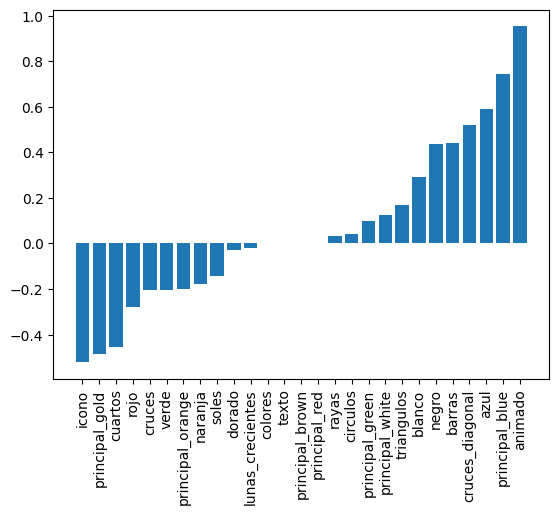

2 = SAmerica


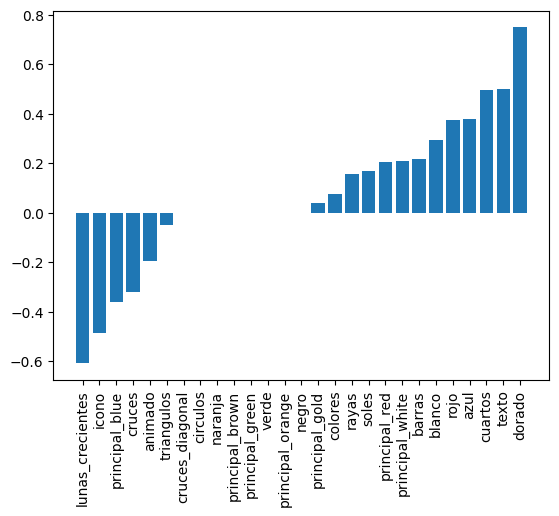

3 = Europa


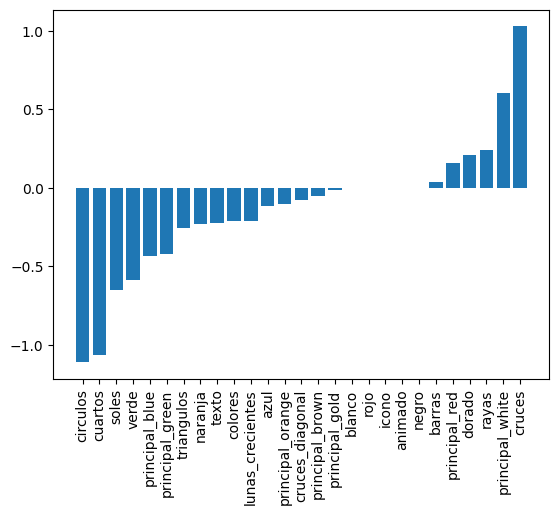

4 = Africa


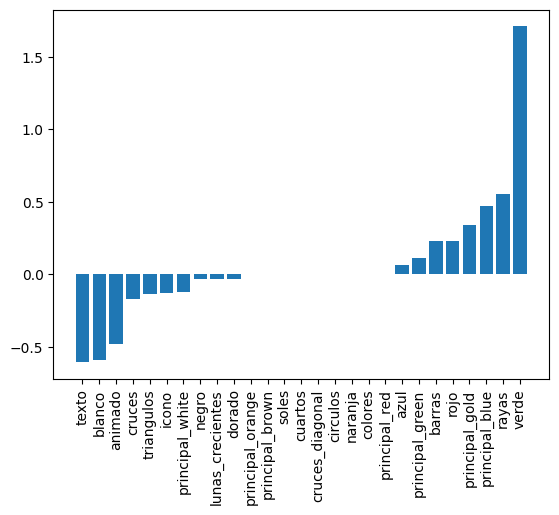

5 = Asia


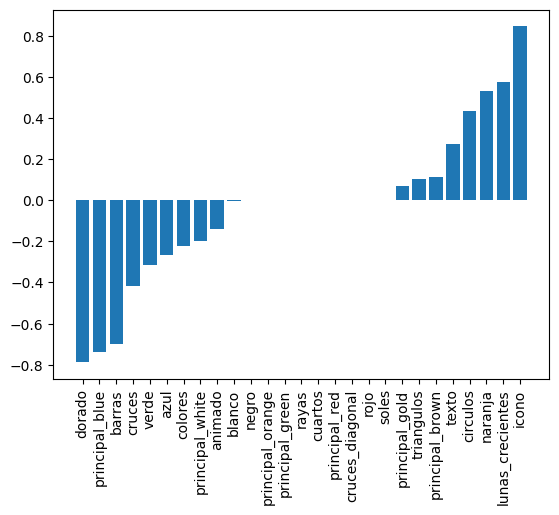

6 = Oceania


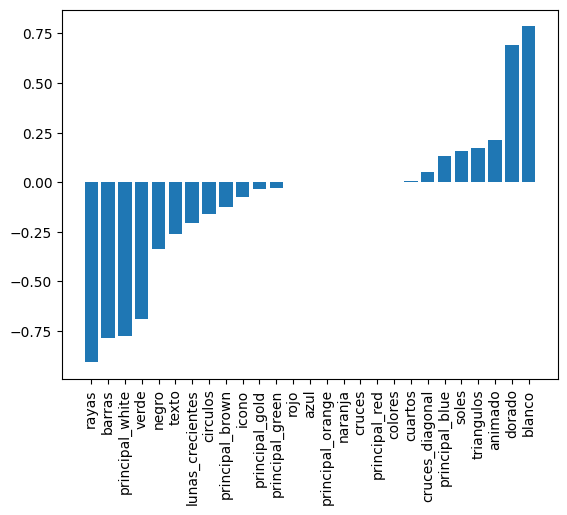

In [ ]:
for i, coef in enumerate(coefficients_con):
    # Obtener índices ordenados por coeficiente
    indices_ordenados = coef.argsort()

    print(etiquetas_continentes[i])

    # Crear un gráfico de barras ordenado por coeficiente
    plt.bar(X_train.columns[indices_ordenados], coef[indices_ordenados])
    plt.xticks(rotation=90)
    plt.show()


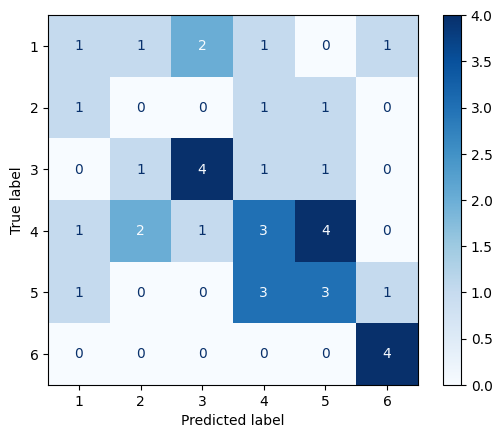

Precisión del modelo: 0.37
Informe de Clasificación:
              precision    recall  f1-score   support

1 = NAmerica       0.25      0.17      0.20         6
2 = SAmerica       0.00      0.00      0.00         3
  3 = Europa       0.57      0.57      0.57         7
  4 = Africa       0.33      0.27      0.30        11
    5 = Asia       0.33      0.38      0.35         8
 6 = Oceania       0.67      1.00      0.80         4

    accuracy                           0.38        39
   macro avg       0.36      0.40      0.37        39
weighted avg       0.37      0.38      0.37        39

País: Trinidad-Tobago
Predicción: 5 = 5 = Asia
Real: 2 = 2 = SAmerica

País: Romania
Predicción: 2 = 2 = SAmerica
Real: 3 = 3 = Europa

País: Philippines
Predicción: 6 = 6 = Oceania
Real: 6 = 6 = Oceania

País: Angola
Predicción: 3 = 3 = Europa
Real: 4 = 4 = Africa

País: Zaire
Predicción: 5 = 5 = Asia
Real: 4 = 4 = Africa

País: Bahrain
Predicción: 5 = 5 = Asia
Real: 5 = 5 = Asia

País: British-Virgi

In [ ]:
X_test = X_test.drop('nombre',axis=1)

# Hacer predicciones en los datos de prueba
y_test_pred_con = best_lr_model_con.predict(X_test)

# Crear una matriz de confusión
# Ajustar las etiquetas para la matriz de confusión
etiquetas_confusion = [str(label) for label in range(1, 7)]

# Crear una matriz de confusión con las etiquetas ajustadas
conf_matrix = confusion_matrix(y_test_con, y_test_pred_con, labels=[1, 2, 3, 4, 5, 6])

# Mostrar la matriz de confusión
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=etiquetas_confusion)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()


# Calcular la precisión del modelo
precision = precision_score(y_test_con, y_test_pred_con, average='weighted')
print(f"Precisión del modelo: {precision:.2f}")

# Imprimir informe de clasificación
print("Informe de Clasificación:")
print(classification_report(y_test_con, y_test_pred_con, labels=[1, 2, 3, 4, 5, 6], target_names=etiquetas_continentes))


# Agregar la columna 'nombre' a X_test
X_test['nombre'] = df_continentes.loc[X_test.index, 'nombre']

# Iterar sobre las predicciones y mostrar la información con el nombre del país
for i in range(len(y_test_con)):
    nombre_pais = X_test.loc[X_test.index[i], 'nombre']
    # Ajustar la etiqueta predicha restando 1
    prediccion_ajustada = y_test_pred_con[i] - 1
    real_ajustado = y_test_con.iloc[i] - 1
    print(f"País: {nombre_pais}")
    print(f"Predicción: {prediccion_ajustada + 1} = {etiquetas_continentes[prediccion_ajustada]}")
    print(f"Real: {real_ajustado + 1} = {etiquetas_continentes[real_ajustado]}")
    print()





#Nuevos Paises

In [ ]:
#1 NAmerica, 2 SAmerica, 3 Europa, 4 Africa, 5 Asia, 6 Oceania
#['0 = Católico', '1 = Otro cristiano', '2 = Musulmán', '3 = Budista','4 = Hindú', '5 = Étnico', '6 = Marxista', '7 = Otros']

serbia_flag = {
    'nombre': 'Serbia',
    'continente': 3,
    'religion': 1,
    'barras': 0,
    'rayas': 3,  # Número de franjas horizontales
    'colores': 3,  # Número de colores distintos
    'rojo': 1,  # Presente
    'verde' : 0,
    'azul': 1,
    'dorado': 1,
    'blanco': 1,
    # Asignar 0 a las columnas restantes
    'negro': 0,
    'naranja': 0,
    'circulos': 0,
    'cruces': 0,
    'cruces_diagonal': 0,
    'cuartos': 0,
    'soles': 0,
    'lunas_crecientes': 0,
    'triangulos': 0,
    'icono': 1,
    'animado': 0,
    'texto': 0,
    'principal_blue': 0,
    'principal_brown': 0,
    'principal_gold': 0,
    'principal_green': 0,
    'principal_orange': 0,
    'principal_red': 0,
    'principal_white': 1
}

# Bandera de Sudán del Sur
sudan_del_sur_flag = {
    'nombre': 'Sudán del Sur',
    'continente': 2,  # África
    'religion': 0,  # catolico
    'barras': 0,
    'rayas': 6,
    'colores': 0,
    'rojo': 1,
    'verde': 0,
    'azul': 1,
    'dorado': 1,
    'blanco': 1,
    'negro': 1,
    'naranja': 0,
    'circulos': 0,
    'cruces': 0,
    'cruces_diagonal': 0,
    'cuartos': 0,
    'soles': 1,
    'lunas_crecientes': 0,
    'triangulos': 1,
    'icono': 1,
    'animado': 0,
    'texto': 0,
    'principal_blue': 1,
    'principal_brown': 0,
    'principal_gold': 0,
    'principal_green': 0,
    'principal_orange': 0,
    'principal_red': 0,
    'principal_white': 0
}

# Bandera de Montenegro
montenegro_flag = {
    'nombre': 'Montenegro',
    'continente': 3,  # Europa
    'religion': 1,  # otro cristiano
    'barras': 0,
    'rayas': 0,
    'colores': 0,
    'rojo': 1,
    'verde': 0,
    'azul': 0,
    'dorado': 1,
    'blanco': 0,
    'negro': 0,
    'naranja': 0,
    'circulos': 0,
    'cruces': 0,
    'cruces_diagonal': 0,
    'cuartos': 0,
    'soles': 0,
    'lunas_crecientes': 0,
    'triangulos': 0,
    'icono': 0,
    'animado': 1,
    'texto': 0,
    'principal_blue': 0,
    'principal_brown': 0,
    'principal_gold': 0,
    'principal_green': 0,
    'principal_orange': 0,
    'principal_red': 1,
    'principal_white': 0
}

georgia_flag = {
    'nombre': 'Georgia',
    'continente': 3,  # Europa
    'religion': 1,  # otro cristiano
    'barras': 0,
    'rayas': 0,
    'colores': 2,
    'rojo': 1,
    'verde': 0,
    'azul': 0,
    'dorado': 0,
    'blanco': 1,
    'negro': 0,
    'naranja': 0,
    'circulos': 0,
    'cruces': 1,
    'cruces_diagonal': 0,
    'cuartos': 0,
    'soles': 0,
    'lunas_crecientes': 0,
    'triangulos': 0,
    'icono': 1,
    'animado': 0,
    'texto': 0,
    'principal_blue': 0,
    'principal_brown': 0,
    'principal_gold': 0,
    'principal_green': 0,
    'principal_orange': 0,
    'principal_red': 1,
    'principal_white': 0
}

kazajistan_flag = {
    'nombre': 'Kazajistan',
    'continente': 5,
    'religion': 2,
    'barras': 0,
    'rayas': 1,
    'colores': 2,
    'rojo': 0,
    'verde': 0,
    'azul': 1,
    'dorado': 1,
    'blanco': 0,
    'negro': 0,
    'naranja': 0,
    'circulos': 0,
    'cruces': 0,
    'cruces_diagonal': 0,
    'cuartos': 0,
    'soles': 1,
    'lunas_crecientes': 0,
    'triangulos': 0,
    'icono': 1,
    'animado': 1,
    'texto': 0,
    'principal_blue': 1,
    'principal_brown': 0,
    'principal_gold': 0,
    'principal_green': 0,
    'principal_orange': 0,
    'principal_red': 1,
    'principal_white': 0
}

turkmenistan_flag = {
    'nombre': 'Turkmenistan',
    'continente': 5,
    'religion': 2,
    'barras': 0,
    'rayas': 1,
    'colores': 2,
    'rojo': 1,
    'verde' : 1,
    'azul': 0,
    'dorado': 0,
    'blanco': 0,
    'negro': 0,
    'naranja': 0,
    'circulos': 0,
    'cruces': 0,
    'cruces_diagonal': 0,
    'cuartos': 0,
    'soles': 1,
    'lunas_crecientes': 1,
    'triangulos': 0,
    'icono': 1,
    'animado': 1,
    'texto': 0,
    'principal_blue': 0,
    'principal_brown': 0,
    'principal_gold': 0,
    'principal_green': 1,
    'principal_orange': 0,
    'principal_red': 0,
    'principal_white': 0
}

eritrea_flag = {
    'nombre': 'Eritrea',
    'continente': 4,
    'religion': 5,
    'barras': 0,
    'rayas': 1,
    'colores': 4,
    'rojo': 1,
    'verde' : 1,
    'azul': 1,
    'dorado': 1,
    'blanco': 0,
    'negro': 0,
    'naranja': 0,
    'circulos': 0,
    'cruces': 0,
    'cruces_diagonal': 0,
    'cuartos': 0,
    'soles': 0,
    'lunas_crecientes': 0,
    'triangulos': 3,
    'icono': 1,
    'animado': 0,
    'texto': 0,
    'principal_blue': 0,
    'principal_brown': 0,
    'principal_gold': 0,
    'principal_green': 0,
    'principal_orange': 0,
    'principal_red': 1,
    'principal_white': 0
}

palaos_flag = {
    'nombre': 'Palaos',
    'continente': 6,
    'religion': 0,
    'barras': 0,
    'rayas': 0,
    'colores': 2,
    'rojo': 0,
    'verde' : 0,
    'azul': 1,
    'dorado': 1,
    'blanco': 0,
    'dorado': 1,
    'negro': 0,
    'naranja': 0,
    'circulos': 1,
    'cruces': 0,
    'cruces_diagonal': 0,
    'cuartos': 0,
    'soles': 0,
    'lunas_crecientes': 0,
    'triangulos': 0,
    'icono': 0,
    'animado': 0,
    'texto': 0,
    'principal_blue': 1,
    'principal_brown': 0,
    'principal_gold': 0,
    'principal_green': 0,
    'principal_orange': 0,
    'principal_red': 0,
    'principal_white': 0
}

'''timor_oriental_flag = {
    'nombre': 'Timor Oriental',
    'continente': 5,
    'religion': 0,
    'barras': 0,
    'rayas': 0,
    'colores': 4,
    'rojo': 1,
    'verde' : 0,
    'azul': 0,
    'dorado': 1,
    'blanco': 1,
    'dorado': 1,
    'negro': 1,
    'naranja': 0,
    'circulos': 0,
    'cruces': 0,
    'cruces_diagonal': 0,
    'cuartos': 0,
    'soles': 1,
    'lunas_crecientes': 0,
    'triangulos': 2,
    'icono': 0,
    'animado': 0,
    'texto': 0,
    'principal_blue': 0,
    'principal_brown': 0,
    'principal_gold': 0,
    'principal_green': 0,
    'principal_orange': 0,
    'principal_red': 1,
    'principal_white': 0
}'''


# Crear DataFrames para los nuevos países
sudan_del_sur_df = pd.DataFrame(sudan_del_sur_flag, index=[0])
montenegro_df = pd.DataFrame(montenegro_flag, index=[0])
serbia_df = pd.DataFrame(serbia_flag, index=[0])
georgia_df = pd.DataFrame(georgia_flag, index=[0])
kazajistan_df = pd.DataFrame(kazajistan_flag, index=[0])
turkmenistan_df = pd.DataFrame(turkmenistan_flag, index=[0])
eritrea_df = pd.DataFrame(eritrea_flag, index=[0])
palaos_df = pd.DataFrame(palaos_flag, index=[0])
#timor_oriental_df = pd.DataFrame(timor_oriental_flag, index=[0])



# Agregar estos DataFrames al conjunto de datos existente
df_prueba = pd.concat([serbia_df, sudan_del_sur_df, montenegro_df, georgia_df, kazajistan_df, turkmenistan_df, eritrea_df, palaos_df], ignore_index=True)


In [ ]:
# Supongamos que 'best_lr_model' es el mejor modelo de regresión logística que obtuviste del grid search

# Crear DataFrame de características para los nuevos países
X_prueba = df_prueba.drop(['nombre', 'religion','continente'], axis=1)

# Hacer predicciones en los datos de prueba
y_pred_prueba = best_lr_model.predict(X_prueba)

# Imprimir las predicciones junto con las religiones reales
etiquetas_religiones = ['0 = Católico', '1 = Otro cristiano', '2 = Musulmán', '3 = Budista', '4 = Hindú', '5 = Étnico']

# Imprimir las predicciones antes de acceder a las etiquetas
print("Valores predichos:")
print(y_pred_prueba)

# Imprimir las predicciones junto con las religiones reales
print("Religión Real vs. Predicción:")
for i, (religion_real, religion_predicha) in enumerate(zip(df_prueba['religion'], y_pred_prueba)):
    nombre_pais = df_prueba.loc[i, 'nombre']
    # Ajustar índices restando 1
    religion_real_nombre = etiquetas_religiones[religion_real]

    # Verificar si la predicción está dentro del rango de índices de etiquetas_religiones
    if 0 <= religion_predicha < len(etiquetas_religiones):
        religion_predicha_nombre = etiquetas_religiones[religion_predicha]
        print(f"{nombre_pais}: Religión Real - {religion_real_nombre}, Predicción - {religion_predicha_nombre}")
    else:
        print(f"{nombre_pais}: Religión Real - {religion_real_nombre}, Predicción - Valor predicho fuera de rango: {religion_predicha}")




Valores predichos:
[3 1 3 3 1 5 4 1]
Religión Real vs. Predicción:
Serbia: Religión Real - 1 = Otro cristiano, Predicción - 3 = Budista
Sudán del Sur: Religión Real - 0 = Católico, Predicción - 1 = Otro cristiano
Montenegro: Religión Real - 1 = Otro cristiano, Predicción - 3 = Budista
Georgia: Religión Real - 1 = Otro cristiano, Predicción - 3 = Budista
Kazajistan: Religión Real - 2 = Musulmán, Predicción - 1 = Otro cristiano
Turkmenistan: Religión Real - 2 = Musulmán, Predicción - 5 = Étnico
Eritrea: Religión Real - 5 = Étnico, Predicción - 4 = Hindú
Palaos: Religión Real - 0 = Católico, Predicción - 1 = Otro cristiano


In [ ]:
etiquetas_continentes = ['1 = NAmerica', '2 = SAmerica', '3 = Europa', '4 = Africa', '5 = Asia', '6 = Oceania']

# Crear DataFrame de características para los nuevos países
X_prueba_continentes = df_prueba.drop(['nombre', 'religion', 'continente'], axis=1)

# Hacer predicciones en los datos de prueba
y_pred_prueba_continentes = best_lr_model_con.predict(X_prueba_continentes)

# Imprimir las predicciones junto con los continentes reales
print("Continente Real vs. Predicción:")
for i, (continente_real, continente_predicha) in enumerate(zip(df_prueba['continente'], y_pred_prueba_continentes)):
    nombre_pais = df_prueba.loc[i, 'nombre']
    continente_real_nombre = etiquetas_continentes[continente_real - 1]
    continente_predicha_nombre = etiquetas_continentes[continente_predicha - 1]
    print(f"{nombre_pais}: Continente Real - {continente_real_nombre}, Predicción - {continente_predicha_nombre}")


Continente Real vs. Predicción:
Serbia: Continente Real - 3 = Europa, Predicción - 6 = Oceania
Sudán del Sur: Continente Real - 2 = SAmerica, Predicción - 6 = Oceania
Montenegro: Continente Real - 3 = Europa, Predicción - 3 = Europa
Georgia: Continente Real - 3 = Europa, Predicción - 3 = Europa
Kazajistan: Continente Real - 5 = Asia, Predicción - 3 = Europa
Turkmenistan: Continente Real - 5 = Asia, Predicción - 2 = SAmerica
Eritrea: Continente Real - 4 = Africa, Predicción - 4 = Africa
Palaos: Continente Real - 6 = Oceania, Predicción - 3 = Europa
Timor Oriental: Continente Real - 5 = Asia, Predicción - 6 = Oceania
